In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost  import XGBRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold

In [35]:
data = pd.read_csv('Data.csv')


In [36]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,200,100,1.5,0.379
1,200,150,1.5,0.424
2,200,50,1.0,0.360
3,200,100,1.0,0.415
4,200,150,1.0,0.386


In [37]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [38]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [39]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [40]:
y=data['Tool wear\nTWmax']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 43)

In [52]:
xgbr = XGBRegressor(objective='reg:squarederror')
RF=RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = "sqrt" , max_depth = 50, bootstrap = True)
xgbr.fit(X_train, y_train)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=200)

In [59]:
print('Accuracy score of XGB on on Test data= {:.8f}'.format(xgbr.score(X_test, y_test)))
pred=xgbr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.7f}".format(rmse))
print("R2: {:.7f}".format(r2))
#cv = RepeatedKFold(n_splits=30, n_repeats=4, random_state=1)
#scores = cross_val_score(xgbr_k, X, y, cv=cv)
#print(scores)

Accuracy score of XGB on on Test data= 0.96314480
Testing performance
RMSE: 0.0117426
R2: 0.9631448


C:\Users\uchih\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\uchih\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [57]:
pred=xgbr.predict(X_test)
pred1=RF.predict(X_test)
pred_avg = (pred + pred1)/2
comparison=pd.DataFrame()
rmse = (np.sqrt(mean_squared_error(y_test, pred_avg)))
r2 = r2_score(y_test, pred_avg)
print("Testing performance")
print("RMSE: {:.7f}".format(rmse))
print("R2: {:.7f}".format(r2))


Testing performance
RMSE: 0.0095176
R2: 0.9757883


C:\Users\uchih\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [15]:
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred_avg
comparison['Std']=comparison.std(axis=1)

In [16]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax,Std
20,0.299,0.298621,0.000268
2,0.360,0.356647,0.002371
15,0.260,0.264740,0.003352
22,0.409,0.401333,0.005421
57,0.363,0.362465,0.000378
91,0.324,0.315403,0.006079
69,0.260,0.264740,0.003352
55,0.221,0.228877,0.005570
11,0.343,0.341521,0.001046
79,0.360,0.356647,0.002371


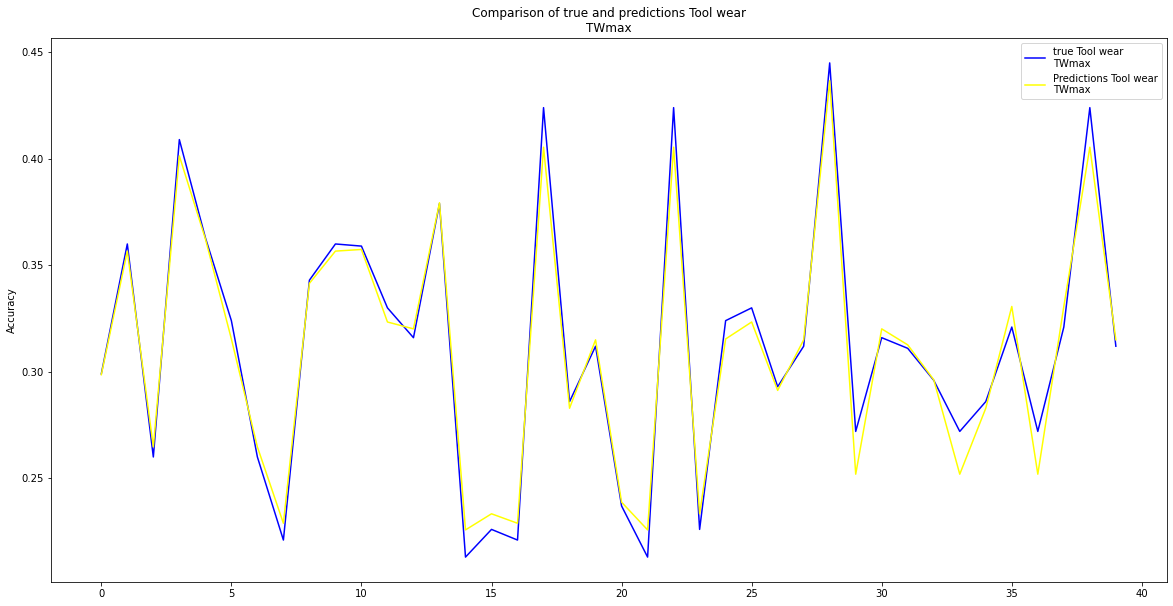

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [18]:
comparison.to_csv(r'XGB_RF.csv', index = False, header=True)

In [16]:
confusion_matrix(y_test, pred)

ValueError: continuous is not supported